<a href="https://colab.research.google.com/github/satyagopalkothuru/machine_learning_colab_experiments/blob/master/Elastic_net_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
#diabetes_df.describe()

In [ ]:
X = diabetes.data
y = diabetes.target
#print(X.shape, y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

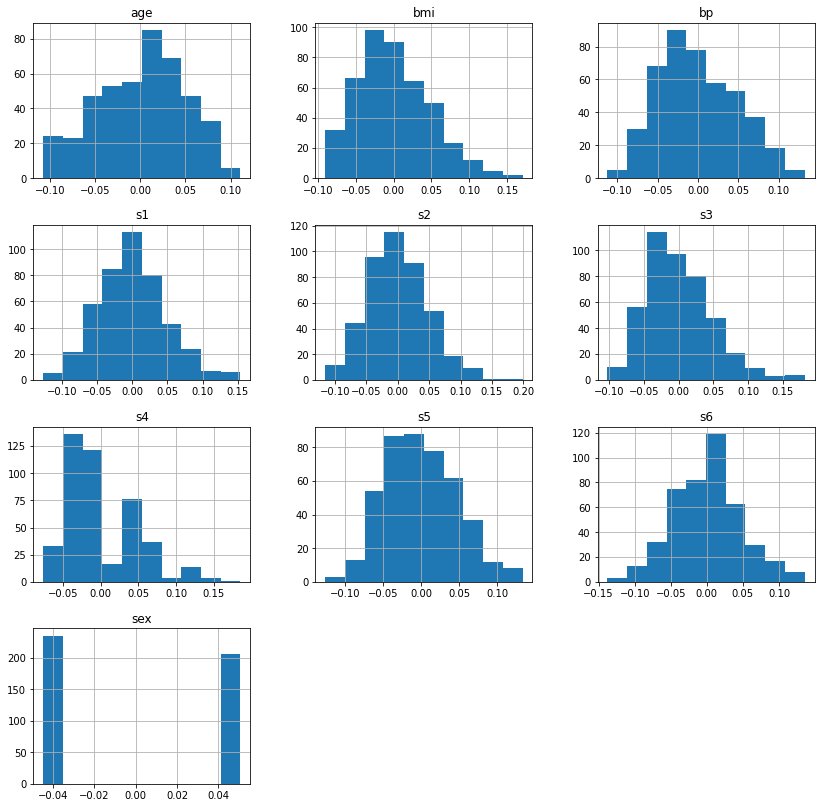

In [ ]:
diabetes_df.hist(figsize=(14,14))
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(StandardScaler(), Ridge(alpha=0.7))
pipeline.fit(X_train, y_train)
y_hat_train = pipeline.predict(X_train)

In [ ]:
ridge_model = Ridge(alpha=0.7, normalize=True)
ridge_model.fit(X_train, y_train)

print(ridge_model.coef_)
print(ridge_model.intercept_)

[  47.62915301 -115.7041973   366.65629652  237.05164429  -21.14856772
  -55.09909262 -171.15599821  128.77583219  278.9803751   111.6106498 ]
151.94896579250712


In [ ]:
linear_model = LinearRegression(normalize=True)
linear_model.fit(X_train, y_train)
print(linear_model.coef_) 
print(linear_model.intercept_) 

[  37.90031426 -241.96624835  542.42575342  347.70830529 -931.46126093
  518.04405547  163.40353476  275.31003837  736.18909839   48.67112488]
151.3456553477407


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
lasso_model = Lasso(alpha=0.7, normalize=True)
lasso_model.fit(X_train, y_train)

print(lasso_model.coef_)
print(lasso_model.intercept_)

[  0.          -0.         497.845806   125.01565396  -0.
  -0.         -37.76497641   0.         333.95323179   0.        ]
152.28157571088383


In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_regr = ElasticNet(random_state=0)
elastic_regr.fit(X_train, y_train)
print(elastic_regr.coef_)
print(elastic_regr.intercept_)

[ 0.40100381  0.          3.41353374  2.32617327  0.45957655  0.1255522
 -1.78311242  2.12401015  3.07138726  1.9061834 ]
153.71775135185501


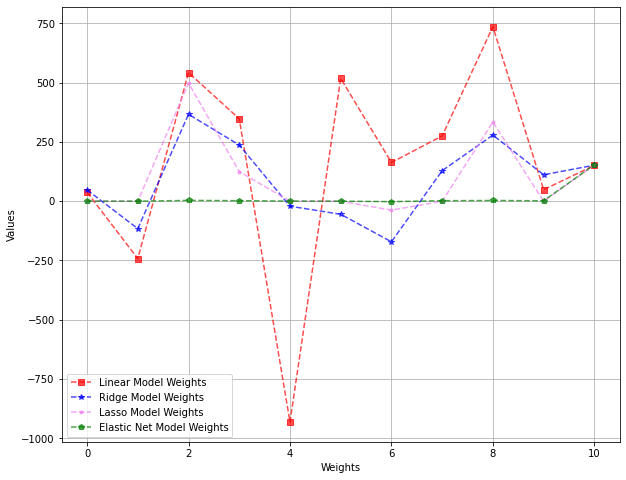

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(list(linear_model.coef_) + [linear_model.intercept_], 's--', alpha=0.7, color='red', label='Linear Model Weights')
plt.plot(list(ridge_model.coef_) + [ridge_model.intercept_], '*--', alpha=0.7, color='blue', label='Ridge Model Weights')
plt.plot(list(lasso_model.coef_) + [lasso_model.intercept_], '.--', alpha=0.7, color='violet', label='Lasso Model Weights')
plt.plot(list(elastic_regr.coef_) + [elastic_regr.intercept_], 'p--', alpha=0.7, color='green', label='Elastic Net Model Weights')
plt.grid()
plt.xlabel('Weights')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
print('Training error(MSE) on Linear Model', mean_squared_error(y_train, linear_model.predict(X_train)))
print('Training error(MSE) on Ridge Model', mean_squared_error(y_train, ridge_model.predict(X_train)))
print('Training error(MSE) on Lasso Model', mean_squared_error(y_train, lasso_model.predict(X_train)))
print('Training error(MSE) on Elastic Net Model', mean_squared_error(y_train, elastic_regr.predict(X_train)))

Training error(MSE) on Linear Model 2868.546584216565
Training error(MSE) on Ridge Model 3149.044622851083
Training error(MSE) on Lasso Model 3397.2703110350017
Training error(MSE) on Elastic Net Model 6022.308210731502


In [ ]:
print('Test error(R2 score) on Linear Model', linear_model.score(X_test, y_test))
print('Test error(R2 score) on Ridge Model', ridge_model.score(X_test, y_test))
print('Test error(R2 score) on Lasso Model', lasso_model.score(X_test, y_test))
print('Test error(R2 score) on Elastic Net Model', elastic_regr.score(X_test, y_test))

Test error(R2 score) on Linear Model 0.4526066021617381
Test error(R2 score) on Ridge Model 0.445959794929518
Test error(R2 score) on Lasso Model 0.42749967748715134
Test error(R2 score) on Elastic Net Model -0.0024651935487560728
